In [1]:
import pandas as pd
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Fire/CDI_Based/Entropy/CSV/Laplacian.csv',index_col=0)
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,1.116591,1.076268,0.964579,0.827250,0.788555,0.717183,0.685219,0.675476,0.645822,0.640040,...,0.919854,0.953868,1.010380,1.181967,1.053482,0.782155,0.685755,0.771562,0.917780,0
1,1.132044,0.942004,0.847378,0.815218,0.794283,0.796818,0.762221,0.724707,0.812962,0.837894,...,1.092682,0.993216,0.867587,1.031902,1.237058,0.976347,0.881224,0.850401,0.844549,0
2,1.761399,1.634343,1.543578,1.592710,1.612295,1.548785,1.550124,1.568618,1.546401,1.628864,...,1.616676,1.602723,1.652010,1.772399,1.760665,1.647880,1.614305,1.567624,1.636149,0
3,0.895756,0.938467,1.064396,1.181068,0.988052,1.038185,1.114712,1.003453,1.014447,1.150527,...,0.015918,0.015918,0.015918,0.007598,0.118888,0.080963,0.019146,0.021540,0.021865,0
4,1.525381,1.297543,1.112897,0.990920,1.217607,1.347222,1.202654,1.422620,1.429657,1.367186,...,1.724537,1.517537,1.476781,1.776136,1.122659,1.110401,1.508056,1.094994,0.963698,0


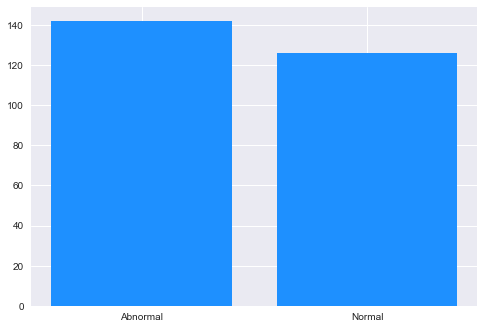

In [37]:

import warnings
warnings.filterwarnings("ignore")
 
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
from sklearn import metrics
num_normal = np.sum(d['Class'] == 0)
num_abnormal = np.sum(d['Class'] == 1)
plt.bar(['Abnormal', 'Normal'], [num_abnormal, num_normal], color='dodgerblue')
plt.show()

In [47]:
# 提取负样本，并且按照8:2切成训练集和测试集
data = d
mask = (data['Class'] == 0)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
#display(X_train.drop(['Class'],axis=1))
# X_train = X_train.drop(['Class'], axis=1).values
# X_test = X_test.drop(['Class'], axis=1).values


X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)

# X_train=X_train.iloc[:,118:].values
# X_test=X_test.iloc[:,118:].values
# 提取所有正样本，作为测试集的一部分
#X_fraud = data[~mask].drop(['Class'], axis=1).values
X_fraud = data[~mask].drop(['Class'], axis=1)
# X_fraud=X_fraud.iloc[:,118:].values

std=MinMaxScaler()
X_train=std.fit_transform(X_train)
X_fraud=std.transform(X_fraud)
X_test=std.transform(X_test)

In [48]:

# 设置Autoencoder的参数
# 隐藏层节点数分别为16，8，8，16
# epoch为50，batch size为32
input_dim = X_train.shape[1]
encoding_dim = 4
num_epoch = 2000
batch_size = 64

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])

# 模型保存为SofaSofa_model.h5，并开始训练模型
checkpointer = ModelCheckpoint(filepath="Laplacian.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(X_train, X_train,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1, 
                          callbacks=[checkpointer]).history



Epoch 1/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.1775 - mae: 0.3538 - val_loss: 0.1980 - val_mae: 0.3769
Epoch 2/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.1749 - mae: 0.3500 - val_loss: 0.1951 - val_mae: 0.3728
Epoch 3/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.1725 - mae: 0.3463 - val_loss: 0.1922 - val_mae: 0.3686
Epoch 4/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.1700 - mae: 0.3424 - val_loss: 0.1894 - val_mae: 0.3644
Epoch 5/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.1674 - mae: 0.3385 - val_loss: 0.1868 - val_mae: 0.3605
Epoch 6/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.1650 - mae: 0.3347 - val_loss: 0.1842 - val_mae: 0.3565
Epoch 7/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.1626 - mae: 0.3308 - val_loss: 0.1817 - val_mae: 0.3526
Epoch 8/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.1601 - m

2/2 [==============================] - 0s 20ms/step - loss: 0.1157 - mae: 0.2615 - val_loss: 0.1339 - val_mae: 0.2776
Epoch 64/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1154 - mae: 0.2612 - val_loss: 0.1337 - val_mae: 0.2772
Epoch 65/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.1152 - mae: 0.2608 - val_loss: 0.1335 - val_mae: 0.2769
Epoch 66/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1150 - mae: 0.2605 - val_loss: 0.1333 - val_mae: 0.2765
Epoch 67/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.1148 - mae: 0.2602 - val_loss: 0.1330 - val_mae: 0.2762
Epoch 68/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.1146 - mae: 0.2599 - val_loss: 0.1328 - val_mae: 0.2759
Epoch 69/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.1144 - mae: 0.2596 - val_loss: 0.1326 - val_mae: 0.2756
Epoch 70/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.1142 - mae: 0.

Epoch 125/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.1076 - mae: 0.2448 - val_loss: 0.1257 - val_mae: 0.2635
Epoch 126/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.1075 - mae: 0.2446 - val_loss: 0.1256 - val_mae: 0.2634
Epoch 127/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.1074 - mae: 0.2444 - val_loss: 0.1256 - val_mae: 0.2632
Epoch 128/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.1074 - mae: 0.2442 - val_loss: 0.1255 - val_mae: 0.2631
Epoch 129/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.1073 - mae: 0.2439 - val_loss: 0.1254 - val_mae: 0.2629
Epoch 130/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.1072 - mae: 0.2437 - val_loss: 0.1253 - val_mae: 0.2628
Epoch 131/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.1071 - mae: 0.2435 - val_loss: 0.1252 - val_mae: 0.2626
Epoch 132/2000
2/2 [==============================] - 0s 22ms/step - 

2/2 [==============================] - 0s 23ms/step - loss: 0.0791 - mae: 0.1974 - val_loss: 0.0942 - val_mae: 0.2145
Epoch 187/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0786 - mae: 0.1965 - val_loss: 0.0936 - val_mae: 0.2133
Epoch 188/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0780 - mae: 0.1955 - val_loss: 0.0929 - val_mae: 0.2119
Epoch 189/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0774 - mae: 0.1944 - val_loss: 0.0920 - val_mae: 0.2104
Epoch 190/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0767 - mae: 0.1932 - val_loss: 0.0911 - val_mae: 0.2088
Epoch 191/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0759 - mae: 0.1919 - val_loss: 0.0902 - val_mae: 0.2073
Epoch 192/2000
2/2 [==============================] - 0s 19ms/step - loss: 0.0750 - mae: 0.1905 - val_loss: 0.0890 - val_mae: 0.2056
Epoch 193/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0741 - 

Epoch 248/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0231 - mae: 0.1150 - val_loss: 0.0299 - val_mae: 0.1225
Epoch 249/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0230 - mae: 0.1147 - val_loss: 0.0298 - val_mae: 0.1223
Epoch 250/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0228 - mae: 0.1144 - val_loss: 0.0297 - val_mae: 0.1221
Epoch 251/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.0227 - mae: 0.1141 - val_loss: 0.0296 - val_mae: 0.1218
Epoch 252/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.0225 - mae: 0.1138 - val_loss: 0.0294 - val_mae: 0.1217
Epoch 253/2000
2/2 [==============================] - ETA: 0s - loss: 0.0248 - mae: 0.119 - 0s 28ms/step - loss: 0.0224 - mae: 0.1135 - val_loss: 0.0293 - val_mae: 0.1216
Epoch 254/2000
2/2 [==============================] - 0s 27ms/step - loss: 0.0223 - mae: 0.1133 - val_loss: 0.0292 - val_mae: 0.1214
Epoch 255/2000
2/2 [===========

2/2 [==============================] - 0s 21ms/step - loss: 0.0179 - mae: 0.1007 - val_loss: 0.0253 - val_mae: 0.1140
Epoch 310/2000
2/2 [==============================] - ETA: 0s - loss: 0.0178 - mae: 0.101 - 0s 20ms/step - loss: 0.0178 - mae: 0.1005 - val_loss: 0.0252 - val_mae: 0.1137
Epoch 311/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0177 - mae: 0.1003 - val_loss: 0.0251 - val_mae: 0.1134
Epoch 312/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0177 - mae: 0.1001 - val_loss: 0.0251 - val_mae: 0.1132
Epoch 313/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0176 - mae: 0.0999 - val_loss: 0.0251 - val_mae: 0.1132
Epoch 314/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0176 - mae: 0.0997 - val_loss: 0.0250 - val_mae: 0.1131
Epoch 315/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0175 - mae: 0.0996 - val_loss: 0.0250 - val_mae: 0.1131
Epoch 316/2000
2/2 [==========================

2/2 [==============================] - 0s 10ms/step - loss: 0.0154 - mae: 0.0923 - val_loss: 0.0230 - val_mae: 0.1088
Epoch 371/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0154 - mae: 0.0923 - val_loss: 0.0229 - val_mae: 0.1088
Epoch 372/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0154 - mae: 0.0922 - val_loss: 0.0228 - val_mae: 0.1081
Epoch 373/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0153 - mae: 0.0919 - val_loss: 0.0227 - val_mae: 0.1074
Epoch 374/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0153 - mae: 0.0917 - val_loss: 0.0226 - val_mae: 0.1070
Epoch 375/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0153 - mae: 0.0916 - val_loss: 0.0226 - val_mae: 0.1071
Epoch 376/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0153 - mae: 0.0915 - val_loss: 0.0226 - val_mae: 0.1075
Epoch 377/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0153 - ma

2/2 [==============================] - 0s 21ms/step - loss: 0.0142 - mae: 0.0878 - val_loss: 0.0213 - val_mae: 0.1045
Epoch 432/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0142 - mae: 0.0877 - val_loss: 0.0213 - val_mae: 0.1044
Epoch 433/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0142 - mae: 0.0876 - val_loss: 0.0213 - val_mae: 0.1049
Epoch 434/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0142 - mae: 0.0876 - val_loss: 0.0213 - val_mae: 0.1052
Epoch 435/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0142 - mae: 0.0876 - val_loss: 0.0213 - val_mae: 0.1052
Epoch 436/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0142 - mae: 0.0876 - val_loss: 0.0213 - val_mae: 0.1049
Epoch 437/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0142 - mae: 0.0875 - val_loss: 0.0212 - val_mae: 0.1045
Epoch 438/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0142 - m

2/2 [==============================] - 0s 21ms/step - loss: 0.0136 - mae: 0.0851 - val_loss: 0.0201 - val_mae: 0.1017
Epoch 493/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0136 - mae: 0.0851 - val_loss: 0.0202 - val_mae: 0.1020
Epoch 494/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0136 - mae: 0.0852 - val_loss: 0.0202 - val_mae: 0.1022
Epoch 495/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0136 - mae: 0.0852 - val_loss: 0.0201 - val_mae: 0.1020
Epoch 496/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0136 - mae: 0.0851 - val_loss: 0.0201 - val_mae: 0.1015
Epoch 497/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0136 - mae: 0.0849 - val_loss: 0.0200 - val_mae: 0.1014
Epoch 498/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0135 - mae: 0.0849 - val_loss: 0.0200 - val_mae: 0.1016
Epoch 499/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0135 - ma

Epoch 554/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0132 - mae: 0.0836 - val_loss: 0.0193 - val_mae: 0.0996
Epoch 555/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0132 - mae: 0.0836 - val_loss: 0.0192 - val_mae: 0.0995
Epoch 556/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0132 - mae: 0.0835 - val_loss: 0.0192 - val_mae: 0.0994
Epoch 557/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0132 - mae: 0.0835 - val_loss: 0.0192 - val_mae: 0.0992
Epoch 558/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0132 - mae: 0.0834 - val_loss: 0.0192 - val_mae: 0.0992
Epoch 559/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0132 - mae: 0.0834 - val_loss: 0.0192 - val_mae: 0.0992
Epoch 560/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0131 - mae: 0.0834 - val_loss: 0.0192 - val_mae: 0.0992
Epoch 561/2000
2/2 [==============================] - 0s 10ms/step - lo

2/2 [==============================] - 0s 20ms/step - loss: 0.0129 - mae: 0.0822 - val_loss: 0.0185 - val_mae: 0.0970
Epoch 616/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0129 - mae: 0.0822 - val_loss: 0.0185 - val_mae: 0.0969
Epoch 617/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0129 - mae: 0.0822 - val_loss: 0.0185 - val_mae: 0.0971
Epoch 618/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0129 - mae: 0.0822 - val_loss: 0.0185 - val_mae: 0.0972
Epoch 619/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0129 - mae: 0.0822 - val_loss: 0.0185 - val_mae: 0.0971
Epoch 620/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0128 - mae: 0.0822 - val_loss: 0.0185 - val_mae: 0.0969
Epoch 621/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0128 - mae: 0.0822 - val_loss: 0.0184 - val_mae: 0.0967
Epoch 622/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0128 - ma

Epoch 677/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0126 - mae: 0.0813 - val_loss: 0.0179 - val_mae: 0.0947
Epoch 678/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0126 - mae: 0.0812 - val_loss: 0.0178 - val_mae: 0.0946
Epoch 679/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0126 - mae: 0.0812 - val_loss: 0.0178 - val_mae: 0.0947
Epoch 680/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0126 - mae: 0.0812 - val_loss: 0.0179 - val_mae: 0.0950
Epoch 681/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0126 - mae: 0.0814 - val_loss: 0.0179 - val_mae: 0.0956
Epoch 682/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0126 - mae: 0.0816 - val_loss: 0.0179 - val_mae: 0.0952
Epoch 683/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0126 - mae: 0.0813 - val_loss: 0.0178 - val_mae: 0.0945
Epoch 684/2000
2/2 [==============================] - 0s 21ms/step - 

2/2 [==============================] - 0s 22ms/step - loss: 0.0124 - mae: 0.0806 - val_loss: 0.0173 - val_mae: 0.0933
Epoch 739/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0124 - mae: 0.0805 - val_loss: 0.0173 - val_mae: 0.0932
Epoch 740/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0124 - mae: 0.0805 - val_loss: 0.0173 - val_mae: 0.0931
Epoch 741/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0124 - mae: 0.0805 - val_loss: 0.0173 - val_mae: 0.0932
Epoch 742/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0124 - mae: 0.0805 - val_loss: 0.0173 - val_mae: 0.0931
Epoch 743/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0124 - mae: 0.0805 - val_loss: 0.0173 - val_mae: 0.0932
Epoch 744/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0124 - mae: 0.0805 - val_loss: 0.0173 - val_mae: 0.0931
Epoch 745/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0124 - 

Epoch 800/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0123 - mae: 0.0797 - val_loss: 0.0169 - val_mae: 0.0915
Epoch 801/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0123 - mae: 0.0797 - val_loss: 0.0169 - val_mae: 0.0922
Epoch 802/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0123 - mae: 0.0799 - val_loss: 0.0169 - val_mae: 0.0922
Epoch 803/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0123 - mae: 0.0798 - val_loss: 0.0169 - val_mae: 0.0916
Epoch 804/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0123 - mae: 0.0797 - val_loss: 0.0169 - val_mae: 0.0913
Epoch 805/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0123 - mae: 0.0797 - val_loss: 0.0169 - val_mae: 0.0918
Epoch 806/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0122 - mae: 0.0797 - val_loss: 0.0169 - val_mae: 0.0924
Epoch 807/2000
2/2 [==============================] - 0s 11ms/step - 

2/2 [==============================] - 0s 11ms/step - loss: 0.0121 - mae: 0.0793 - val_loss: 0.0165 - val_mae: 0.0911
Epoch 862/2000
2/2 [==============================] - 0s 24ms/step - loss: 0.0121 - mae: 0.0793 - val_loss: 0.0165 - val_mae: 0.0902
Epoch 863/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0121 - mae: 0.0789 - val_loss: 0.0165 - val_mae: 0.0901
Epoch 864/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0121 - mae: 0.0789 - val_loss: 0.0165 - val_mae: 0.0907
Epoch 865/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0121 - mae: 0.0791 - val_loss: 0.0165 - val_mae: 0.0910
Epoch 866/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0121 - mae: 0.0792 - val_loss: 0.0165 - val_mae: 0.0905
Epoch 867/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0120 - mae: 0.0789 - val_loss: 0.0165 - val_mae: 0.0899
Epoch 868/2000
2/2 [==============================] - 0s 20ms/step - loss: 0.0121 - m

Epoch 923/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0119 - mae: 0.0784 - val_loss: 0.0161 - val_mae: 0.0892
Epoch 924/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0119 - mae: 0.0783 - val_loss: 0.0161 - val_mae: 0.0891
Epoch 925/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0119 - mae: 0.0783 - val_loss: 0.0161 - val_mae: 0.0891
Epoch 926/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0119 - mae: 0.0783 - val_loss: 0.0161 - val_mae: 0.0894
Epoch 927/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0119 - mae: 0.0784 - val_loss: 0.0161 - val_mae: 0.0890
Epoch 928/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0119 - mae: 0.0783 - val_loss: 0.0161 - val_mae: 0.0890
Epoch 929/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0118 - mae: 0.0782 - val_loss: 0.0161 - val_mae: 0.0889
Epoch 930/2000
2/2 [==============================] - 0s 21ms/step - 

2/2 [==============================] - 0s 9ms/step - loss: 0.0117 - mae: 0.0776 - val_loss: 0.0158 - val_mae: 0.0878
Epoch 985/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0117 - mae: 0.0776 - val_loss: 0.0158 - val_mae: 0.0880
Epoch 986/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0117 - mae: 0.0776 - val_loss: 0.0158 - val_mae: 0.0881
Epoch 987/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0117 - mae: 0.0776 - val_loss: 0.0158 - val_mae: 0.0878
Epoch 988/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0117 - mae: 0.0775 - val_loss: 0.0158 - val_mae: 0.0876
Epoch 989/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0116 - mae: 0.0775 - val_loss: 0.0158 - val_mae: 0.0879
Epoch 990/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0116 - mae: 0.0776 - val_loss: 0.0158 - val_mae: 0.0880
Epoch 991/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0116 - m

2/2 [==============================] - 0s 9ms/step - loss: 0.0114 - mae: 0.0768 - val_loss: 0.0155 - val_mae: 0.0865
Epoch 1046/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.0114 - mae: 0.0768 - val_loss: 0.0155 - val_mae: 0.0870
Epoch 1047/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0114 - mae: 0.0769 - val_loss: 0.0155 - val_mae: 0.0869
Epoch 1048/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0114 - mae: 0.0768 - val_loss: 0.0155 - val_mae: 0.0865
Epoch 1049/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0114 - mae: 0.0767 - val_loss: 0.0155 - val_mae: 0.0866
Epoch 1050/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0114 - mae: 0.0768 - val_loss: 0.0154 - val_mae: 0.0866
Epoch 1051/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0114 - mae: 0.0767 - val_loss: 0.0155 - val_mae: 0.0863
Epoch 1052/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0

2/2 [==============================] - 0s 22ms/step - loss: 0.0112 - mae: 0.0759 - val_loss: 0.0152 - val_mae: 0.0857
Epoch 1107/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0112 - mae: 0.0759 - val_loss: 0.0152 - val_mae: 0.0860
Epoch 1108/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0112 - mae: 0.0759 - val_loss: 0.0152 - val_mae: 0.0855
Epoch 1109/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0112 - mae: 0.0758 - val_loss: 0.0153 - val_mae: 0.0853
Epoch 1110/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0112 - mae: 0.0758 - val_loss: 0.0152 - val_mae: 0.0854
Epoch 1111/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0112 - mae: 0.0759 - val_loss: 0.0152 - val_mae: 0.0855
Epoch 1112/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0112 - mae: 0.0758 - val_loss: 0.0152 - val_mae: 0.0851
Epoch 1113/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.01

2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - mae: 0.0749 - val_loss: 0.0150 - val_mae: 0.0844
Epoch 1168/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0109 - mae: 0.0750 - val_loss: 0.0150 - val_mae: 0.0847
Epoch 1169/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - mae: 0.0749 - val_loss: 0.0150 - val_mae: 0.0844
Epoch 1170/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - mae: 0.0748 - val_loss: 0.0150 - val_mae: 0.0843
Epoch 1171/2000
2/2 [==============================] - ETA: 0s - loss: 0.0107 - mae: 0.074 - 0s 24ms/step - loss: 0.0109 - mae: 0.0748 - val_loss: 0.0150 - val_mae: 0.0846
Epoch 1172/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.0109 - mae: 0.0749 - val_loss: 0.0150 - val_mae: 0.0846
Epoch 1173/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0109 - mae: 0.0749 - val_loss: 0.0150 - val_mae: 0.0843
Epoch 1174/2000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 0.0107 - mae: 0.0740 - val_loss: 0.0147 - val_mae: 0.0835
Epoch 1229/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0107 - mae: 0.0740 - val_loss: 0.0147 - val_mae: 0.0836
Epoch 1230/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0107 - mae: 0.0740 - val_loss: 0.0147 - val_mae: 0.0835
Epoch 1231/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0107 - mae: 0.0740 - val_loss: 0.0147 - val_mae: 0.0835
Epoch 1232/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.0107 - mae: 0.0740 - val_loss: 0.0147 - val_mae: 0.0835
Epoch 1233/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0107 - mae: 0.0740 - val_loss: 0.0147 - val_mae: 0.0833
Epoch 1234/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0107 - mae: 0.0739 - val_loss: 0.0148 - val_mae: 0.0832
Epoch 1235/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.

2/2 [==============================] - 0s 24ms/step - loss: 0.0105 - mae: 0.0733 - val_loss: 0.0144 - val_mae: 0.0826
Epoch 1290/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0105 - mae: 0.0732 - val_loss: 0.0145 - val_mae: 0.0825
Epoch 1291/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.0105 - mae: 0.0731 - val_loss: 0.0144 - val_mae: 0.0827
Epoch 1292/2000
2/2 [==============================] - 0s 14ms/step - loss: 0.0105 - mae: 0.0733 - val_loss: 0.0144 - val_mae: 0.0827
Epoch 1293/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0105 - mae: 0.0732 - val_loss: 0.0145 - val_mae: 0.0824
Epoch 1294/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0105 - mae: 0.0731 - val_loss: 0.0144 - val_mae: 0.0825
Epoch 1295/2000
2/2 [==============================] - 0s 28ms/step - loss: 0.0105 - mae: 0.0732 - val_loss: 0.0144 - val_mae: 0.0827
Epoch 1296/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.

2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - mae: 0.0723 - val_loss: 0.0142 - val_mae: 0.0817
Epoch 1351/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0723 - val_loss: 0.0142 - val_mae: 0.0818
Epoch 1352/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0724 - val_loss: 0.0142 - val_mae: 0.0818
Epoch 1353/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0723 - val_loss: 0.0142 - val_mae: 0.0817
Epoch 1354/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0723 - val_loss: 0.0142 - val_mae: 0.0818
Epoch 1355/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0723 - val_loss: 0.0143 - val_mae: 0.0817
Epoch 1356/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.0723 - val_loss: 0.0142 - val_mae: 0.0818
Epoch 1357/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.

2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - mae: 0.0717 - val_loss: 0.0140 - val_mae: 0.0811
Epoch 1412/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - mae: 0.0718 - val_loss: 0.0140 - val_mae: 0.0811
Epoch 1413/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0101 - mae: 0.0718 - val_loss: 0.0140 - val_mae: 0.0811
Epoch 1414/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - mae: 0.0717 - val_loss: 0.0140 - val_mae: 0.0811
Epoch 1415/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0101 - mae: 0.0717 - val_loss: 0.0140 - val_mae: 0.0811
Epoch 1416/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - mae: 0.0717 - val_loss: 0.0140 - val_mae: 0.0811
Epoch 1417/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - mae: 0.0717 - val_loss: 0.0140 - val_mae: 0.0810
Epoch 1418/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 0.0100 - mae: 0.0714 - val_loss: 0.0137 - val_mae: 0.0803
Epoch 1473/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0100 - mae: 0.0712 - val_loss: 0.0139 - val_mae: 0.0803
Epoch 1474/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - mae: 0.0711 - val_loss: 0.0137 - val_mae: 0.0803
Epoch 1475/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - mae: 0.0712 - val_loss: 0.0137 - val_mae: 0.0803
Epoch 1476/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - mae: 0.0712 - val_loss: 0.0138 - val_mae: 0.0803
Epoch 1477/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0100 - mae: 0.0710 - val_loss: 0.0137 - val_mae: 0.0803
Epoch 1478/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - mae: 0.0711 - val_loss: 0.0137 - val_mae: 0.0802
Epoch 1479/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.01

2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - mae: 0.0708 - val_loss: 0.0135 - val_mae: 0.0796
Epoch 1534/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - mae: 0.0706 - val_loss: 0.0136 - val_mae: 0.0796
Epoch 1535/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - mae: 0.0705 - val_loss: 0.0135 - val_mae: 0.0796
Epoch 1536/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - mae: 0.0707 - val_loss: 0.0135 - val_mae: 0.0796
Epoch 1537/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - mae: 0.0707 - val_loss: 0.0136 - val_mae: 0.0795
Epoch 1538/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - mae: 0.0705 - val_loss: 0.0135 - val_mae: 0.0795
Epoch 1539/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - mae: 0.0706 - val_loss: 0.0135 - val_mae: 0.0795
Epoch 1540/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.00

2/2 [==============================] - 0s 25ms/step - loss: 0.0098 - mae: 0.0702 - val_loss: 0.0132 - val_mae: 0.0789
Epoch 1595/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0098 - mae: 0.0704 - val_loss: 0.0133 - val_mae: 0.0788
Epoch 1596/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0098 - mae: 0.0702 - val_loss: 0.0134 - val_mae: 0.0789
Epoch 1597/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.0098 - mae: 0.0702 - val_loss: 0.0132 - val_mae: 0.0790
Epoch 1598/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0098 - mae: 0.0704 - val_loss: 0.0133 - val_mae: 0.0789
Epoch 1599/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - mae: 0.0702 - val_loss: 0.0133 - val_mae: 0.0789
Epoch 1600/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0098 - mae: 0.0702 - val_loss: 0.0133 - val_mae: 0.0789
Epoch 1601/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.

2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - mae: 0.0700 - val_loss: 0.0131 - val_mae: 0.0783
Epoch 1656/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - mae: 0.0699 - val_loss: 0.0132 - val_mae: 0.0783
Epoch 1657/2000
2/2 [==============================] - 0s 14ms/step - loss: 0.0097 - mae: 0.0698 - val_loss: 0.0131 - val_mae: 0.0783
Epoch 1658/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - mae: 0.0700 - val_loss: 0.0131 - val_mae: 0.0783
Epoch 1659/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - mae: 0.0699 - val_loss: 0.0131 - val_mae: 0.0783
Epoch 1660/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0097 - mae: 0.0698 - val_loss: 0.0130 - val_mae: 0.0784
Epoch 1661/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - mae: 0.0700 - val_loss: 0.0131 - val_mae: 0.0783
Epoch 1662/2000
2/2 [==============================] - 0s 9ms/step - loss: 0.0

2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - mae: 0.0695 - val_loss: 0.0129 - val_mae: 0.0777
Epoch 1717/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - mae: 0.0697 - val_loss: 0.0129 - val_mae: 0.0778
Epoch 1718/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - mae: 0.0696 - val_loss: 0.0130 - val_mae: 0.0778
Epoch 1719/2000
2/2 [==============================] - 0s 17ms/step - loss: 0.0097 - mae: 0.0696 - val_loss: 0.0129 - val_mae: 0.0777
Epoch 1720/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - mae: 0.0696 - val_loss: 0.0129 - val_mae: 0.0777
Epoch 1721/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - mae: 0.0696 - val_loss: 0.0130 - val_mae: 0.0777
Epoch 1722/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - mae: 0.0695 - val_loss: 0.0130 - val_mae: 0.0777
Epoch 1723/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.

2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - mae: 0.0694 - val_loss: 0.0128 - val_mae: 0.0773
Epoch 1778/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - mae: 0.0693 - val_loss: 0.0128 - val_mae: 0.0773
Epoch 1779/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - mae: 0.0693 - val_loss: 0.0128 - val_mae: 0.0773
Epoch 1780/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - mae: 0.0693 - val_loss: 0.0128 - val_mae: 0.0772
Epoch 1781/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0096 - mae: 0.0693 - val_loss: 0.0128 - val_mae: 0.0772
Epoch 1782/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - mae: 0.0693 - val_loss: 0.0128 - val_mae: 0.0772
Epoch 1783/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0096 - mae: 0.0693 - val_loss: 0.0128 - val_mae: 0.0772
Epoch 1784/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.

Epoch 1838/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - mae: 0.0691 - val_loss: 0.0126 - val_mae: 0.0768
Epoch 1839/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.0096 - mae: 0.0691 - val_loss: 0.0125 - val_mae: 0.0769
Epoch 1840/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - mae: 0.0692 - val_loss: 0.0126 - val_mae: 0.0768
Epoch 1841/2000
2/2 [==============================] - 0s 16ms/step - loss: 0.0096 - mae: 0.0691 - val_loss: 0.0126 - val_mae: 0.0768
Epoch 1842/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0096 - mae: 0.0691 - val_loss: 0.0126 - val_mae: 0.0769
Epoch 1843/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0096 - mae: 0.0692 - val_loss: 0.0126 - val_mae: 0.0769
Epoch 1844/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - mae: 0.0692 - val_loss: 0.0127 - val_mae: 0.0768
Epoch 1845/2000
2/2 [==============================] - 0s 13ms

2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - mae: 0.0690 - val_loss: 0.0124 - val_mae: 0.0765
Epoch 1900/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0690 - val_loss: 0.0124 - val_mae: 0.0765
Epoch 1901/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - mae: 0.0690 - val_loss: 0.0125 - val_mae: 0.0764
Epoch 1902/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0689 - val_loss: 0.0125 - val_mae: 0.0764
Epoch 1903/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.0095 - mae: 0.0689 - val_loss: 0.0124 - val_mae: 0.0765
Epoch 1904/2000
2/2 [==============================] - 0s 14ms/step - loss: 0.0096 - mae: 0.0691 - val_loss: 0.0124 - val_mae: 0.0764
Epoch 1905/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - mae: 0.0689 - val_loss: 0.0125 - val_mae: 0.0763
Epoch 1906/2000
2/2 [==============================] - 0s 23ms/step - loss: 0.

2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0690 - val_loss: 0.0123 - val_mae: 0.0760
Epoch 1961/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0688 - val_loss: 0.0124 - val_mae: 0.0760
Epoch 1962/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0688 - val_loss: 0.0122 - val_mae: 0.0761
Epoch 1963/2000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - mae: 0.0689 - val_loss: 0.0123 - val_mae: 0.0760
Epoch 1964/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0689 - val_loss: 0.0123 - val_mae: 0.0759
Epoch 1965/2000
2/2 [==============================] - 0s 13ms/step - loss: 0.0095 - mae: 0.0688 - val_loss: 0.0123 - val_mae: 0.0759
Epoch 1966/2000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - mae: 0.0688 - val_loss: 0.0122 - val_mae: 0.0759
Epoch 1967/2000
2/2 [==============================] - 0s 10ms/step - loss: 0.

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


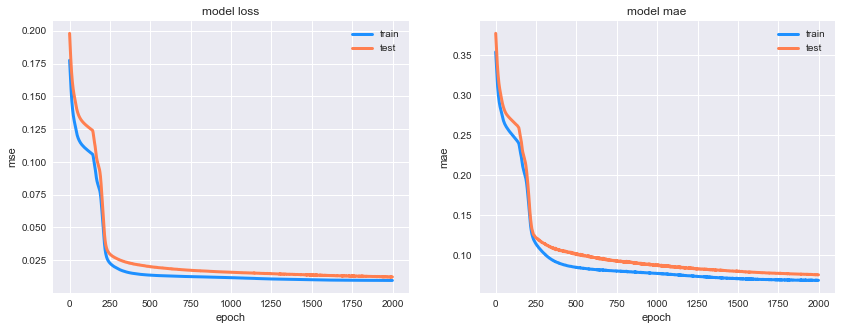

In [49]:
print(history.keys())

# 画出损失函数曲线
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(history['loss'], c='dodgerblue', lw=3)
plt.plot(history['val_loss'], c='coral', lw=3)
plt.title('model loss')
plt.ylabel('mse'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(122)
plt.plot(history['mae'], c='dodgerblue', lw=3)
plt.plot(history['val_mae'], c='coral', lw=3)
plt.title('model mae')
plt.ylabel('mae'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [50]:
# 读取模型
#print(len(X_train[4]))
autoencoder = load_model('Laplacian.h5')
#pred=autoencoder.predict(X_test[0].reshape(1,29))
#print(pred)
#print(X_test[0].shape)
# 利用训练好的autoencoder重建测试集
pred_test = autoencoder.predict(X_test)
pred_fraud = autoencoder.predict(X_fraud)

# 计算还原误差MSE和MAE
mse_test = np.mean(np.power(X_test - pred_test, 2), axis=1)
mse_fraud = np.mean(np.power(X_fraud - pred_fraud, 2), axis=1)
mae_test = np.mean(np.abs(X_test - pred_test), axis=1)
mae_fraud = np.mean(np.abs(X_fraud - pred_fraud), axis=1)
mse_df = pd.DataFrame()
mse_df['Class'] = [0] * len(mse_test) + [1] * len(mse_fraud)
mse_df['MSE'] = np.hstack([mse_test, mse_fraud])
mse_df['MAE'] = np.hstack([mae_test, mae_fraud])
mse_df = mse_df.sample(frac=1).reset_index(drop=True)


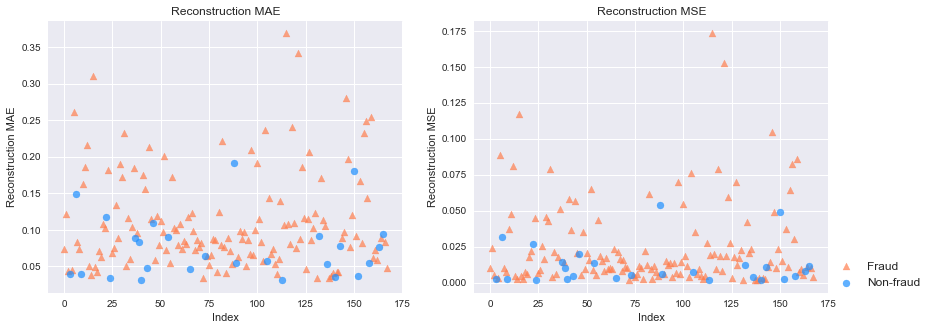

In [51]:
# 分别画出测试集中正样本和负样本的还原误差MAE和MSE
markers = ['o', '^']
markers = ['o', '^']
colors = ['dodgerblue', 'coral']
labels = ['Non-fraud', 'Fraud']

plt.figure(figsize=(14, 5))
plt.subplot(121)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index, 
                temp['MAE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.title('Reconstruction MAE')
plt.ylabel('Reconstruction MAE'); plt.xlabel('Index')
plt.subplot(122)
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp.index, 
                temp['MSE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.legend(loc=[1, 0], fontsize=12); plt.title('Reconstruction MSE')
plt.ylabel('Reconstruction MSE'); plt.xlabel('Index')
plt.show()

In [52]:
test_df = pd.DataFrame({'Test MSE': mse_test})
anormaly_df = pd.DataFrame({"Anormaly MSE": mse_fraud})
sum_test=test_df.describe()
sum_test['Anormaly MSE']=anormaly_df.describe()['Anormaly MSE']
display(sum_test)
print(['MAE','MSE'])

,Test MSE,Anormaly MSE
count,26.000000,142.000000
mean,0.012014,0.024385
std,0.013926,0.028976
min,0.001495,0.001834
25%,0.002778,0.006582
50%,0.006559,0.013589
75%,0.013457,0.026872
max,0.053710,0.173280


['MAE', 'MSE']


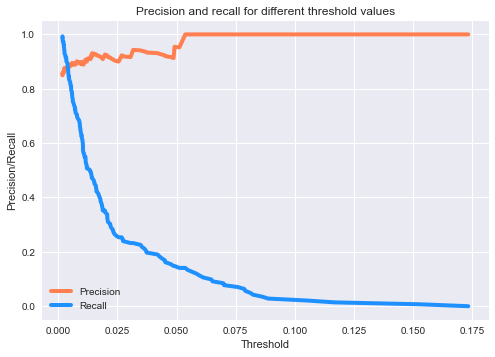

In [53]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(mse_df['Class'], mse_df['MSE'])

plt.plot(threshold_rt, precision_rt[1:], c='coral',label="Precision",linewidth=4)
plt.plot(threshold_rt, recall_rt[1:],c='dodgerblue', label="Recall",linewidth=4)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

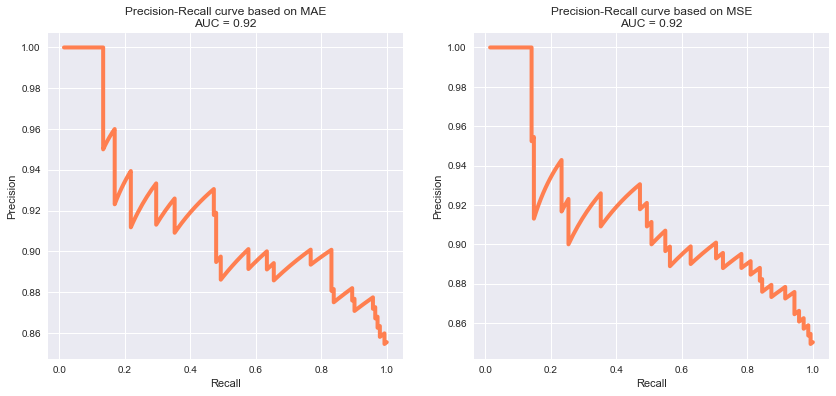

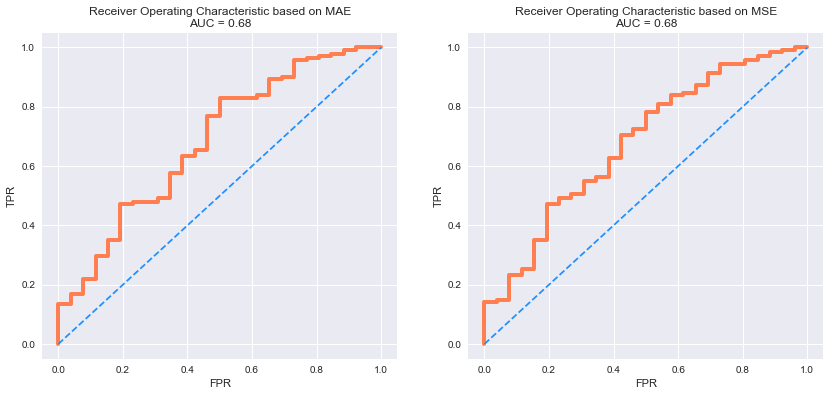

In [54]:
# 画出Precision-Recall曲线
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['MAE', 'MSE']):
    plt.subplot(1, 2, i+1)
    precision, recall, _ = precision_recall_curve(mse_df['Class'], mse_df[metric])
    pr_auc = auc(recall, precision)
    plt.title('Precision-Recall curve based on %s\nAUC = %0.2f'%(metric, pr_auc))
    plt.plot(recall[:-2], precision[:-2], c='coral', lw=4)
    plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()

# 画出ROC曲线
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['MAE', 'MSE']):
    plt.subplot(1, 2, i+1)
    fpr, tpr, _ = roc_curve(mse_df['Class'], mse_df[metric])
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic based on %s\nAUC = %0.2f'%(metric, roc_auc))
    plt.plot(fpr, tpr, c='coral', lw=4)
    plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
    plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

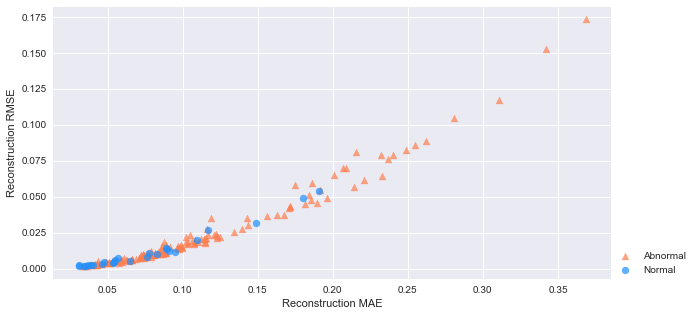

In [55]:
# 画出MSE、MAE散点图
markers = ['o', '^']
colors = ['dodgerblue', 'coral']
labels = ['Normal', 'Abnormal']

plt.figure(figsize=(10, 5))
for flag in [1, 0]:
    temp = mse_df[mse_df['Class'] == flag]
    plt.scatter(temp['MAE'], 
                temp['MSE'],  
                alpha=0.7, 
                marker=markers[flag], 
                c=colors[flag], 
                label=labels[flag])
plt.legend(loc=[1, 0])
plt.ylabel('Reconstruction RMSE'); plt.xlabel('Reconstruction MAE')
plt.show()

0.8273809523809523
              precision    recall  f1-score   support

           0       0.41      0.27      0.33        26
           1       0.87      0.93      0.90       142

    accuracy                           0.83       168
   macro avg       0.64      0.60      0.61       168
weighted avg       0.80      0.83      0.81       168



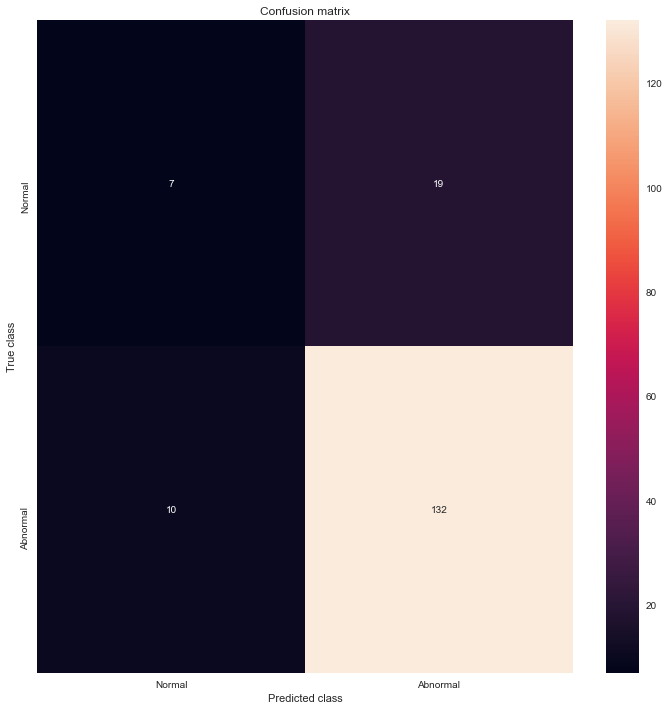

In [73]:
LABELS = ["Normal", "Abnormal"]
threshold_fixed = 0.003

pred_y = [1 if e > threshold_fixed else 0 for e in mse_df['MSE'].values]
conf_matrix = confusion_matrix(mse_df['Class'], pred_y)
accuracy=metrics.accuracy_score(mse_df['Class'],pred_y)
print(accuracy)
print(classification_report(mse_df['Class'], pred_y))
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()